In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\LAKSHAY
[nltk_data]     JAIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [26]:
df = pd.read_csv("../data/TCPD_QH.tsv", sep="\t")

In [27]:
df.head()

,id,date,ls_number,ministry,question_type,question_text,answer_text,member,party,state,constituency,constituency_type,gender,subject,link
0,10173416,2017-08-02T00:00:00,16,Railways,Unstarred,(a) the number of cases which came to notice w...,MINISTER OF STATE IN THE MINISTRY OF RAILWAYS ...,RAJESH VERMA,BJP,Uttar Pradesh,Sitapur,GEN,Male,Cases of Fighting/Quarrels in Trains,https://loksabha.nic.in/Questions/QResult15.as...
1,10173216,2017-08-02T00:00:00,16,Information and Broadcasting,Unstarred,(a) the salient features of the Community Radi...,THE MINISTER OF STATE OF THE MINISTRY OF INFOR...,B. SREERAMULU,BJP,Karnataka,Bellary,ST,Male,Community Radio Station,https://loksabha.nic.in/Questions/QResult15.as...
2,10173116,2017-08-02T00:00:00,16,Skill Development and Entrepreneurship,Unstarred,(a) whether the India International Skill Cent...,(a) to (e) As on date 14 India International S...,"MEENAKASHI LEKHI, RAVINDRA KUMAR PANDEY","BJP, BJP","Delhi, Jharkhand","New delhi, Giridih","GEN, GEN","Female, Male",India International Skill Centre,https://loksabha.nic.in/Questions/QResult15.as...
3,10173016,2017-08-02T00:00:00,16,Housing and Urban Affairs,Unstarred,Will the Minister of HOUSING AND URBAN AFFAIRS...,THE MINISTER OF STATE IN THE MINISTRY OF HOUSI...,RAJENDRAN S,ADMK,Tamil Nadu,Viluppuram,SC,Male,MoU with Reckitt Benckiser,https://loksabha.nic.in/Questions/QResult15.as...
4,10172916,2017-08-02T00:00:00,16,Minority Affairs,Unstarred,(a) whether the Government proposes to carry o...,MINISTER OF STATE (INDEPENDENT CHARGE) FOR MIN...,DILIP PATEL,BJP,Gujarat,Anand,GEN,Male,Employment Surveys,https://loksabha.nic.in/Questions/QResult15.as...


In [28]:
df.shape

(298293, 15)

In [29]:
df = df[['question_text', 'subject']] ## predicition basis
df.dropna(inplace=True)

In [30]:
df.reset_index(drop=True, inplace=True)

In [31]:
df.shape

(298249, 2)

In [32]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = text.split()
    tokens = [w for w in tokens if w not in stop_words and len(w) > 2]
    return ' '.join(tokens)

In [33]:
df['clean_question'] = df['question_text'].apply(clean_text)
df = df[df['clean_question'].str.len() > 10]

In [34]:
df.shape

(298052, 3)

In [39]:
top_subjects = df['subject'].value_counts().nlargest(10).index.tolist()
df_subject = df[df['subject'].isin(top_subjects)].copy()
df_subject.reset_index(drop=True, inplace=True)

In [40]:
df_subject.shape

(607, 3)

In [41]:
## weak sentiment labeling
from textblob import TextBlob
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return 2  # Positive
    elif polarity < -0.1:
        return 0  # Negative
    else:
        return 1  # Neutral
    

In [42]:
df_subject['sentiment'] = df_subject['clean_question'].apply(get_sentiment)

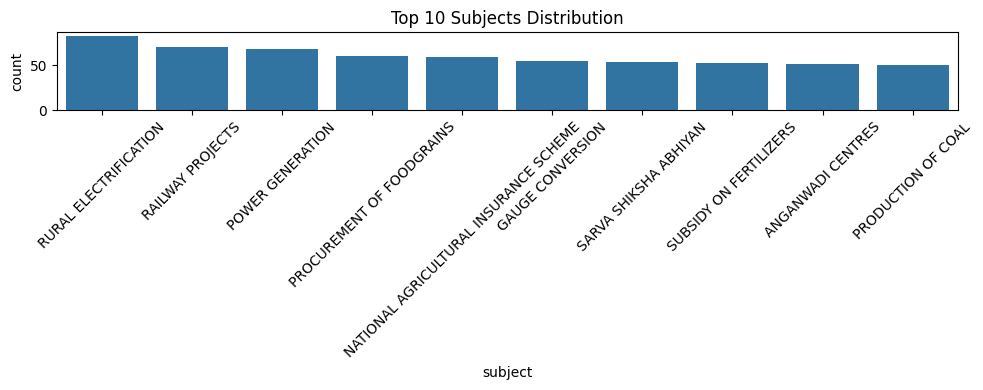

In [43]:
## Visualization
plt.figure(figsize=(10, 4))
sns.countplot(data=df_subject, x='subject', order=top_subjects)
plt.xticks(rotation=45)
plt.title("Top 10 Subjects Distribution")
plt.tight_layout()
plt.show()

In [46]:
print(df_subject.columns)

Index(['question_text', 'subject', 'clean_question', 'sentiment'], dtype='object')


C:\Users\LAKSHAY JAIN\AppData\Local\Temp\ipykernel_14540\3461980378.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_subject, x='sentiment_label', palette='Set2')


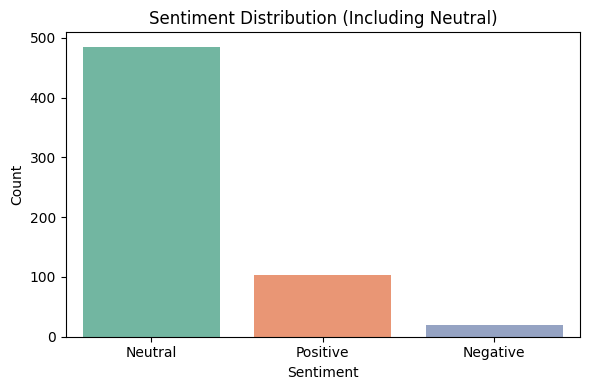

In [47]:
label_map = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
df_subject['sentiment_label'] = df_subject['sentiment'].map(label_map)

plt.figure(figsize=(6, 4))
sns.countplot(data=df_subject, x='sentiment_label', palette='Set2')
plt.title("Sentiment Distribution (Including Neutral)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [50]:
df_subject[['clean_question', 'subject']].to_csv("clean_subject_data.csv", index=False)
df_subject[['clean_question', 'sentiment']].to_csv("clean_sentiment_data.csv", index=False)